### Experiment 8

Comparison of Calssification algorithms using precision, recall and accuraccy

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Step 1: Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Step 2: Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
# Step 3: Define models
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=50),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [6]:
# Step 4: Train & Evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    
    results.append([name, acc, prec, rec])

/home/aditya/ml_lab_IT2718/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
# Step 5: Display results
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall"])
print(df_results)

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.911111   0.915535  0.911111
1        Decision Tree  0.977778   0.979167  0.977778
2        Random Forest  0.888889   0.898148  0.888889
3                  SVM  0.911111   0.915535  0.911111
4                  KNN  0.911111   0.929825  0.911111


#### *Accuraccy*


- Accuracy=TP+TN/(FP+FN+TP+TN) Correct predictions over total predictions

-  Use case: Works well when classes are balanced (e.g., classifying handwritten digits where each digit has similar frequency).
    
-  Limitation: Misleading when data is imbalanced (e.g., 95% “No Disease” vs 5% “Disease”).


#### *Precision* 

- Precision=TP/(FP+TP)​  ; (Out of predicted positives, how many are correct)

- Use case: Important when false positives are costly.

- Example: Email spam filter → predicting an important mail as spam (false positive) is bad.

### *Recall*

- Recall=TP/(FN+TP)​ ; (Out of actual positives, how many were correctly predicted)

- Use case: Important when false negatives are costly.

- Example: Medical diagnosis → failing to detect a disease (false negative) is worse than a false alarm.

### *F1 Score*

- Harmonic mean of precision and recall:
	F1=	2⋅Precision.Recall / (Precision + Recall​)

- Use case: Useful when there’s a trade-off between precision and recall, especially on imbalanced datasets.

- Example: Fraud detection (need both high recall and high precision).

### *Confusion Matrix*

- A confusion matrix is a performance measurement tool for classification problems.

- It shows how many predictions are correct and how many are incorrect, broken down by each class.

- Rows represent the actual labels, while columns represent the predicted labels.

- It is especially useful to understand not only overall accuracy but also the type of errors (false positives, false negatives).

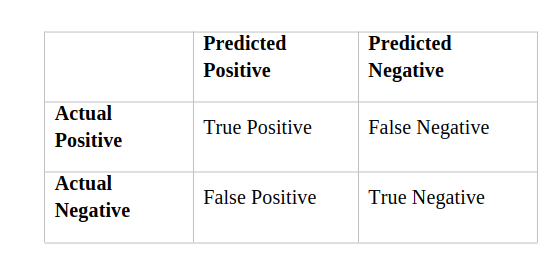